In [163]:
from ete3 import Tree
from datasketch import MinHash, MinHashLSHForest
from random import choice
from string import ascii_uppercase
import time





In [164]:
def create_trees(size):

    names_library = [''.join(choice(ascii_uppercase) for i in range(50)) for _ in range(size+5)]

    t1 = Tree()
    t1.populate(size, names_library=names_library )

    t2 = Tree()
    t2.populate(size, names_library=names_library)

    return t1,t2

In [155]:
def create_dl(t):
    for node in t.traverse("postorder"):
        if node.is_leaf():
            node.dl = set([node.name])
        else:
            node.dl = set()

            for c in node.children:
                node.dl.update(c.dl)

            node.dl.add('||'.join(sorted([e.name for e in node.get_leaves()])))
            


  

In [156]:
def create_minhash_with_LSH(t):
    
    lsh = MinHashLSHForest(num_perm=128)
        
    for node in t.traverse("postorder"):
        m = MinHash(num_perm=128)
        
        for d in node.dl:
            m.update(d.encode('utf8'))
        
        lsh.add(node, m)
        node.mh = m
    
    return lsh



In [157]:
def brute_BCN(tree1, tree2):
    

    
    for query in tree1.traverse("postorder"):

        query.jaccard = 0
        query.BCN = None

        for target in tree2.traverse("postorder"):

            jac = len(target.dl.intersection(query.dl))/len(target.dl.union(query.dl))

            if jac > query.jaccard:
                query.jaccard = jac
                query.BCN = target



            

In [158]:
def lsh_BCN(tree, lsh):

    for query in tree.traverse("postorder"):
        
        result = lsh.query(query.mh,5)

        query.jaccardMH = 0
        query.BCNMH = None

        for target in result:
            jac = len(target.dl.intersection(query.dl))/len(target.dl.union(query.dl))
            if  jac > query.jaccardMH:
                query.jaccardMH = jac
                query.BCNMH = target




In [152]:

start = time.time()
t1,t2 = create_trees(10000)
end = time.time()
print("Create trees", end - start)


start = time.time()
create_dl(t1)
create_dl(t2)
end = time.time()
print("Create DeepLeaf", end - start)

start = time.time()
lsh1 = create_minhash_with_LSH(t1)
lsh2 = create_minhash_with_LSH(t2)
end = time.time()
print("Create MinHash & LSH", end - start)


start = time.time()
brute_BCN(t1, t2)
brute_BCN(t2, t1) 
end = time.time()
print("Create BRUTE BCN", end - start)

start = time.time()
lsh_BCN(t1, lsh2)
lsh_BCN(t2, lsh1)
end = time.time()
print("Create LSH BCN", end - start)


x = '''
for node in t1.traverse("postorder"):
    if query.jaccardMH != query.jaccard:
        print('JACCARD ERROR')
    if query.BCNMH != query.BCN:
        print('BCN ERROR')
        
for node in t2.traverse("postorder"):
    if query.jaccardMH != query.jaccard:
        print('JACCARD ERROR')
    if query.BCNMH != query.BCN:
        print('BCN ERROR')
'''




Create trees 0.11960101127624512
Create DeepLeaf 0.3793222904205322
Create MinHash & LSH 21.037126064300537


KeyboardInterrupt: 

In [125]:
Create trees 0.14911103248596191
Create DeepLeaf 0.3625359535217285
Create MinHash & LSH 29.42011594772339
Create BRUTE BCN 1051.6373472213745
Create LSH BCN 10.032048225402832

SyntaxError: invalid syntax (1950158151.py, line 1)

In [165]:
sizes = [1,100,1000,5000,10000, 20000, 50000]
times = []

for s in sizes:
    start = time.time()
    
    t1,t2 = create_trees(s)
    
    create_dl(t1)
    create_dl(t2)
    
    lsh1 = create_minhash_with_LSH(t1)
    lsh2 = create_minhash_with_LSH(t2)
    
    lsh_BCN(t1, lsh2)
    lsh_BCN(t2, lsh1)
    
    end = time.time()
    times.append(end-start)
    


[1, 100, 1000, 5000, 10000, 20000, 50000] [0.2141118049621582, 0.2391037940979004, 2.467801809310913, 12.677470922470093, 25.31147813796997, 54.83856272697449, 134.94903182983398]


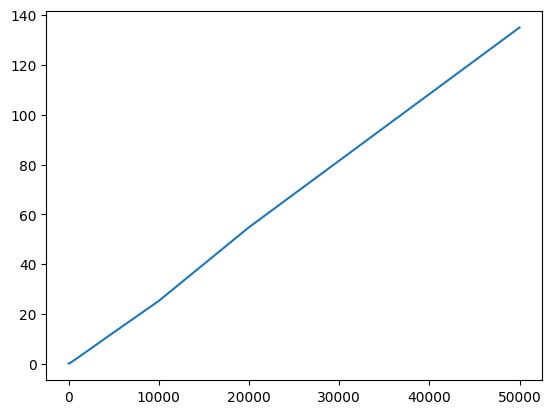

In [166]:

import matplotlib.pyplot as plt

print(sizes,times)
  

plt.plot(sizes, times)
    
plt.show()